# Data Augmentation

In [14]:
from matplotlib import pyplot as plt

In [15]:
from lib.utils.data import load_integer_dataset, RandomCrop, RandomHorizontalFlip, AugmentationPipeline, Transform
from lib.utils.enums import Dataset
from lib.utils.misc import to_cpu

In [16]:
def plot_images(images, labels, num_img: int = 6) -> None:
    fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

    # Iterate through the selected number of images
    for i in range(num_img):
        ax = axes[i % num_img]
        image = to_cpu(images[i])
        ax.imshow(image.transpose(1, 2, 0), cmap='gray')
        ax.set_title(labels[i])
        ax.axis('off')

    # Adjust layout and display the images
    plt.tight_layout()
    plt.show()

In [17]:
dataset_config = dict(
    dataset=Dataset.CIFAR10.name,
    subsample_ratio=0.1,
    ohe_values=(0, 32),
    add_padding=False, 
    normalize=True,
    device='cuda',
    augmentation_p=0.9
)    

In [18]:
dataset = Dataset[dataset_config["dataset"]]
print(f'Loading dataset {dataset.name}...')
data = load_integer_dataset(dataset_config, ohe_values=dataset_config["ohe_values"], add_padding=dataset_config["add_padding"], val_dim=0, show_images=False)

Loading dataset CIFAR10...
Files already downloaded and verified
Files already downloaded and verified
Subsampling applied: training on 5000 samples
Data normalized. New statistics:
-  Min: [-126 -123 -105]
-  Max: [127 127 127]
- Mean: [0 0 0]
-  Std: [62 61 61]

Moved data to device: <CUDA Device 0>
Train set:  (5000, 3, 32, 32), (5000, 10)
Test set:   (10000, 3, 32, 32), (10000, 10)
Data types: (int8, int8)


In [19]:
x_train, _, x_test, y_train, _, y_test = data

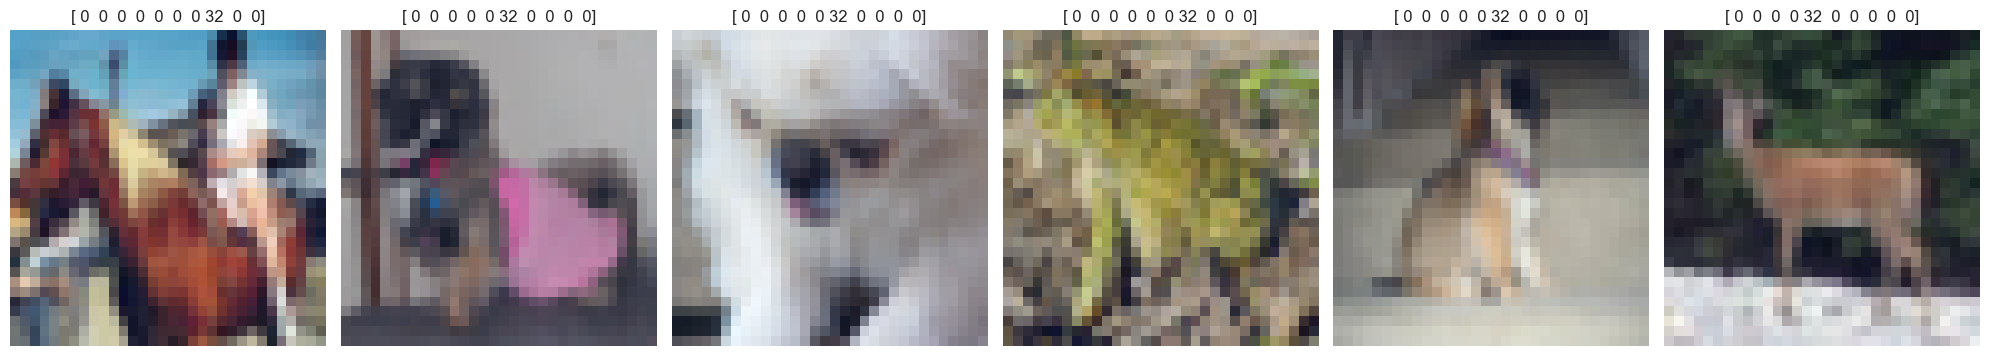

In [20]:
plot_images(x_train + 128, y_train, num_img=6)

# Horizontal Flip

In [21]:
h_flip: Transform = RandomHorizontalFlip(probability=dataset_config['augmentation_p'])

(5000, 3, 32, 32)


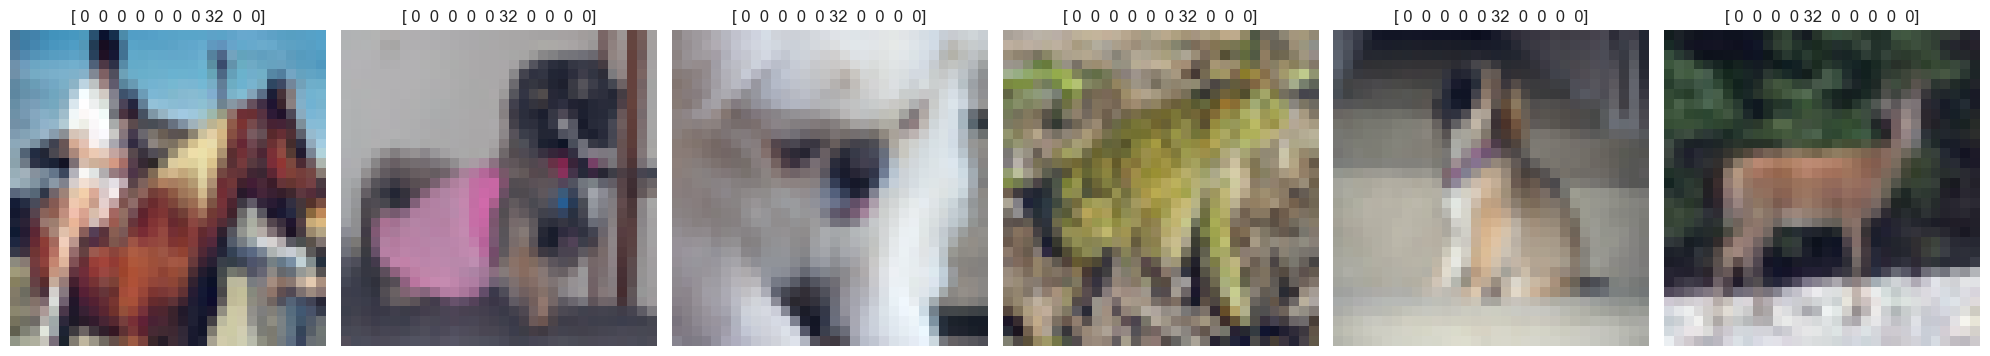

In [22]:
h_flip_data = h_flip.transform(x_train)
print(h_flip_data.shape)
plot_images(h_flip_data + 128, y_train, num_img=6)

# Crop

In [23]:
h_crop: Transform = RandomCrop(size=x_train.shape[2], padding=4, probability=dataset_config['augmentation_p'])

(5000, 3, 32, 32)


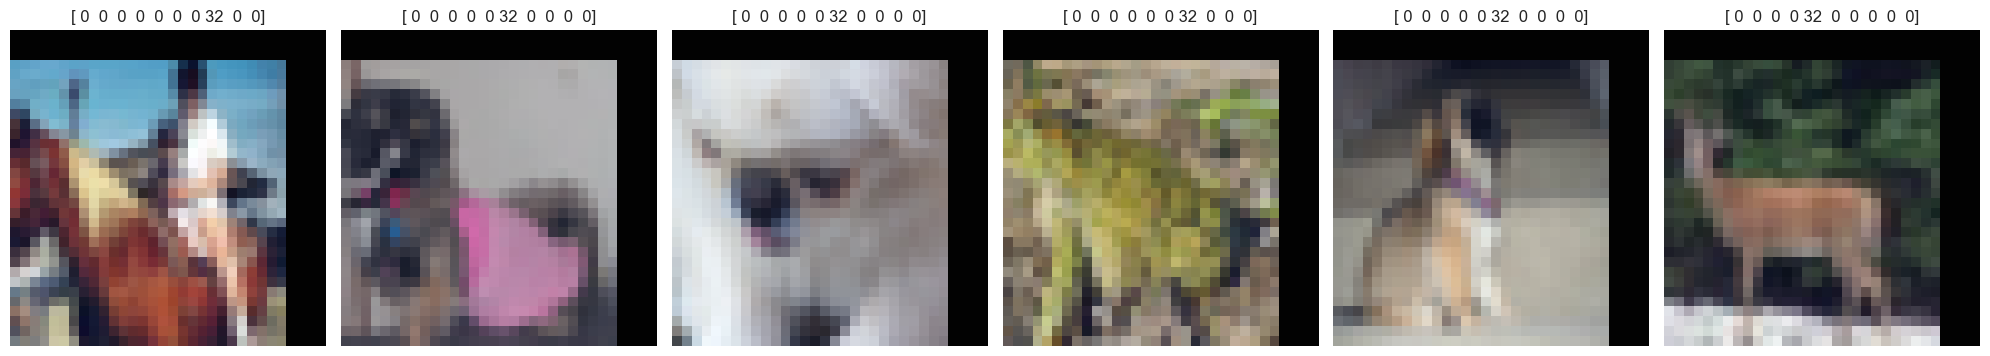

In [24]:
h_crop_data = h_crop(x_train)
print(h_crop_data.shape)
plot_images(h_crop_data + 128, y_train, num_img=6)

# Augmentation Pipeline

In [25]:
augmentation_pipeline = AugmentationPipeline([h_crop, h_flip])

(5000, 3, 32, 32)


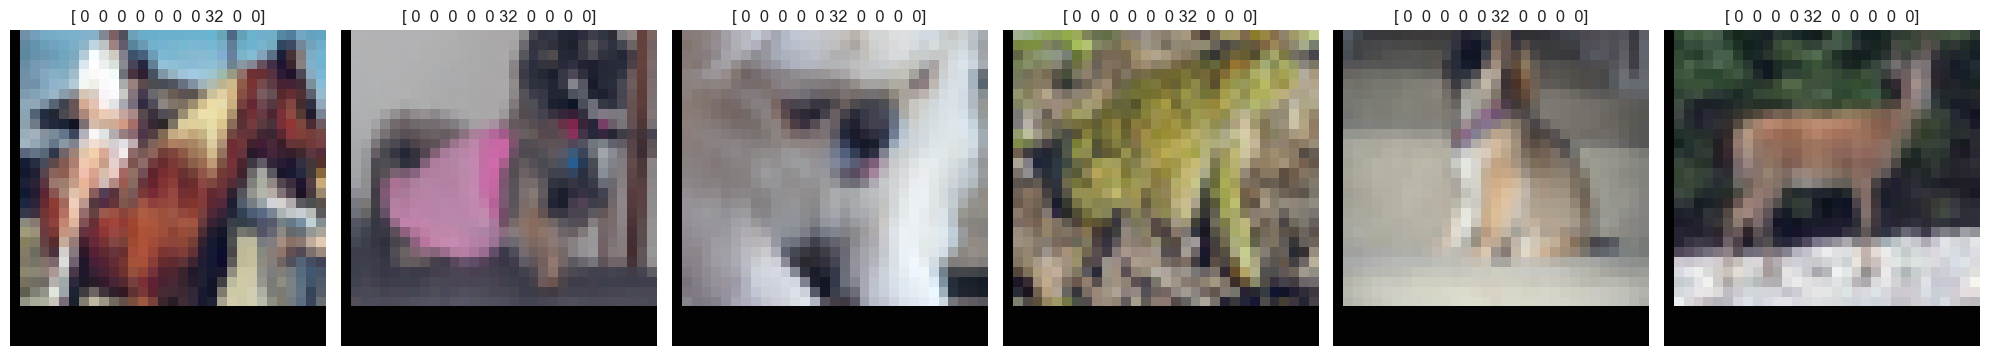

In [26]:
augmented_data = augmentation_pipeline(x_train)
print(augmented_data.shape)
plot_images(augmented_data + 128, y_train, num_img=6)